# 1 Load the CSV file into a pandas DataFrame.

# 2 Display the first 10 rows of the dataset.

# 3 Print the number of rows and columns.

# 4 Check data types and identify missing values.

# 5 Replace missing values in the 'country' column with 'Unknown'.

# 6 Remove rows with missing 'New_cases' values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Load the CSV file into a pandas DataFrame.
# 2 Display the first 10 rows of the dataset.

In [2]:
df = pd.read_csv('WHO-COVID-19-global-daily-data.csv')
print(df.head(10))

  Date_reported Country_code              Country WHO_region  New_cases  \
0    2020-01-04           AF          Afghanistan        EMR        NaN   
1    2020-01-04           DZ              Algeria        AFR        NaN   
2    2020-01-04           AL              Albania        EUR        NaN   
3    2020-01-04           AI             Anguilla        AMR        NaN   
4    2020-01-04           AS       American Samoa        WPR        0.0   
5    2020-01-04           AM              Armenia        EUR        NaN   
6    2020-01-04           AG  Antigua and Barbuda        AMR        NaN   
7    2020-01-04           AZ           Azerbaijan        EUR        NaN   
8    2020-01-04           AD              Andorra        EUR        NaN   
9    2020-01-04           AT              Austria        EUR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2              

# 3 Print the number of rows and columns.

In [3]:
print(df.shape)

(516240, 8)


# 4 Check data types and identify missing values

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516240 entries, 0 to 516239
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      516240 non-null  object 
 1   Country_code       514089 non-null  object 
 2   Country            516240 non-null  object 
 3   WHO_region         516240 non-null  object 
 4   New_cases          211809 non-null  float64
 5   Cumulative_cases   516240 non-null  int64  
 6   New_deaths         154656 non-null  float64
 7   Cumulative_deaths  516240 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 31.5+ MB
None


In [5]:
print(df.columns)

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')


In [6]:
df.isnull().sum()

Date_reported             0
Country_code           2151
Country                   0
WHO_region                0
New_cases            304431
Cumulative_cases          0
New_deaths           361584
Cumulative_deaths         0
dtype: int64

# 5 Replace missing values in the 'country' column with 'Unknown'.

In [7]:
df['Country'] = df['Country'].fillna('Unknown')

# 6 Remove rows with missing 'New_cases' values.

In [8]:
df = df.dropna(subset=['New_cases'])

# 7 Convert the 'Date_reported' column to datetime format.

# 8 Using NumPy, calculate the average number of new cases.

# 9 Identify the minimum and maximum number of new cases reported.

# 10 Count how many unique countries are present in the dataset.

# 11 Identify the WHO region with the highest cumulative cases.

# 12 Group the data by WHO region and compute summary statistics.

# # 7 Ensure the 'Date_reported' column is in an appropriate datetime or period format.

In [9]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# 8 Using NumPy, calculate the average  new cases.

In [10]:
np.mean(df['New_cases'])

np.float64(3677.637989887115)

# 9 Identify the minimum and maximum  new cases recorded.

In [11]:
np.max(df['New_cases'].dropna())

np.float64(6966046.0)

In [12]:
np.min(df['New_cases'])

np.float64(-65079.0)

# 10 Count how many unique countries are represented in the dataset.

In [13]:
df['Country'].nunique()

240

# 11 Identify the WHO region with the highest cumulative cases.

In [14]:
region_totals = df.groupby('WHO_region')['Cumulative_cases'].sum()
highest_region = region_totals.idxmax()

highest_region


'WPR'

# 12 Group the data by WHO region and compute summary statistics.

In [15]:
# group by WHO_region and describe New_cases
df.groupby("WHO_region")["New_cases"].describe()

,count,mean,std,min,25%,50%,75%,max
WHO_region,,,,,,,,
AFR,36331.0,263.941070,1266.319904,-875.0,6.0,28.0,123.00,46914.0
AMR,37437.0,5175.592462,28527.102815,-8261.0,19.0,175.0,1222.00,1265520.0
EMR,20284.0,1154.501627,2877.099435,1.0,55.0,263.0,1051.00,50228.0
EUR,49394.0,5701.651597,39152.480947,-1.0,54.0,395.0,2142.00,2417043.0
OTHER,28.0,27.285714,31.385131,1.0,2.0,11.5,47.25,99.0
SEAR,15414.0,3576.087518,22103.776267,-749.0,0.0,13.0,365.75,414188.0
WPR,52921.0,4070.993745,84885.606916,-65079.0,0.0,0.0,29.00,6966046.0


# 13 Determine the top 5 countries by cumulative cases.

# 14 Create a bar chart showing cumulative cases for the top 5 countries.

# 15 Create a histogram of new cases.

# 16 Create a count plot for WHO regions.

# 17 Plot the number of new cases over time.


# 13 Determine the top 5 countries by cumulative cases.

In [16]:
# determine top 5 countries by cumulative cases
top_countries = df.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).head(5)
top_countries

Country
United States of America    103436829
China                        99381761
India                        45056126
France                       39052931
Germany                      38437919
Name: Cumulative_cases, dtype: int64

# 14 Create a bar chart showing cumulative cases for the top 5 countries.


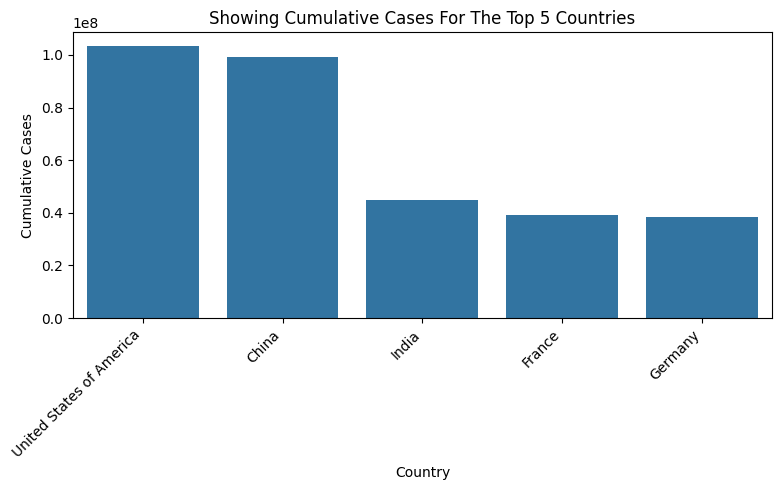

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Showing Cumulative Cases For The Top 5 Countries")
plt.xlabel('Country')
plt.ylabel('Cumulative Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# 15 Create a histogram of new cases.

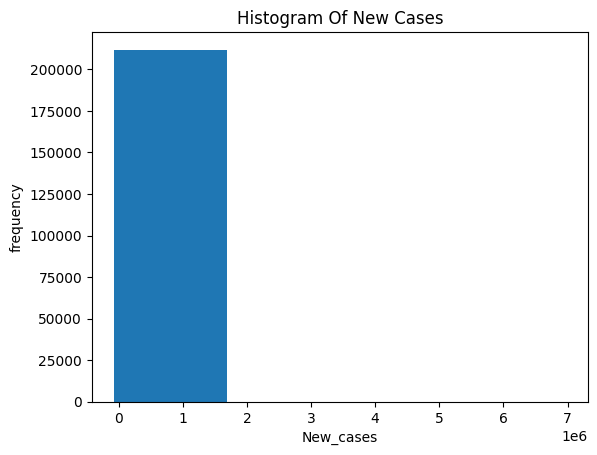

In [18]:
plt.Figure(figsize=(8,5))
plt.hist(data=df, x = 'New_cases', bins = 4)
plt.title("Histogram Of New Cases")
plt.xlabel('New_cases')
plt.ylabel('frequency')

plt.show()

# 16 Create a count plot for WHO regions.

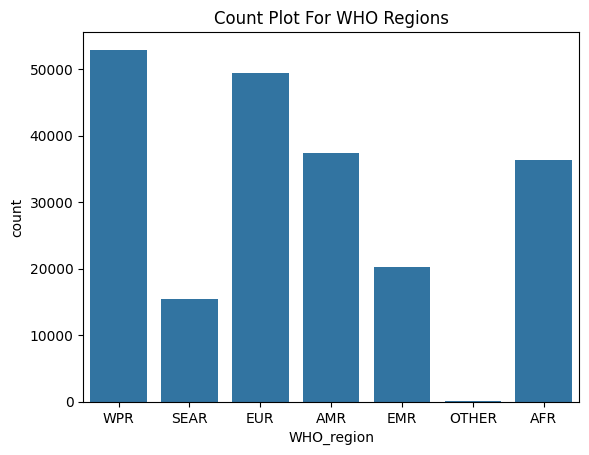

In [19]:
plt.Figure(figsize=(8,5))
sns.countplot(data=df, x = 'WHO_region')

plt.title("Count Plot For WHO Regions")
plt.xlabel('WHO_region')
plt.ylabel('count')

plt.show()

# 17 Plot the number of new cases over time.

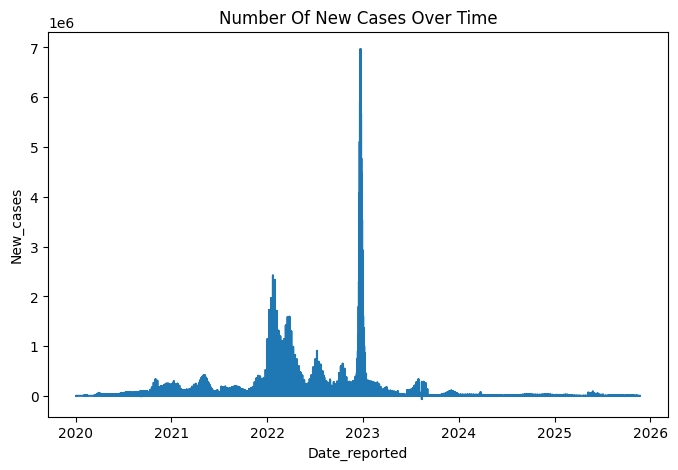

In [22]:
plt.figure(figsize=(8,5))
plt.plot(df['Date_reported'], df['New_cases'])
plt.title("Number Of New Cases Over Time")
plt.ylabel('New_cases')
plt.xlabel('Date_reported')

plt.show()